In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('Prj-Sonar.csv',names=range(0,61),header=0)
ds.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
ds= pd.DataFrame(data=ds)
ds

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
ds.shape

(207, 61)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       207 non-null    float64
 1   1       207 non-null    float64
 2   2       207 non-null    float64
 3   3       207 non-null    float64
 4   4       207 non-null    float64
 5   5       207 non-null    float64
 6   6       207 non-null    float64
 7   7       207 non-null    float64
 8   8       207 non-null    float64
 9   9       207 non-null    float64
 10  10      207 non-null    float64
 11  11      207 non-null    float64
 12  12      207 non-null    float64
 13  13      207 non-null    float64
 14  14      207 non-null    float64
 15  15      207 non-null    float64
 16  16      207 non-null    float64
 17  17      207 non-null    float64
 18  18      207 non-null    float64
 19  19      207 non-null    float64
 20  20      207 non-null    float64
 21  21      207 non-null    float64
 22  22

In [6]:
ds.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
ds.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

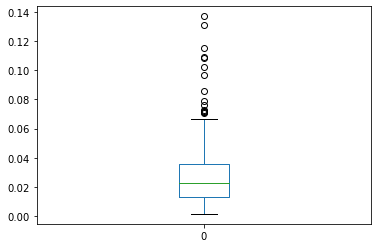

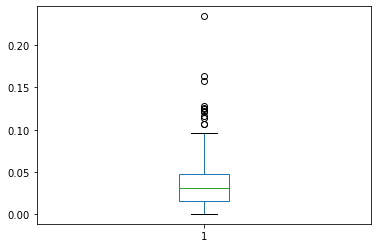

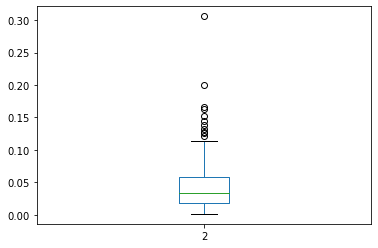

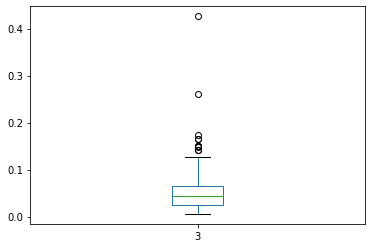

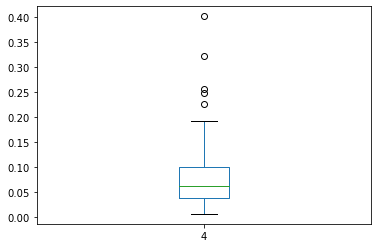

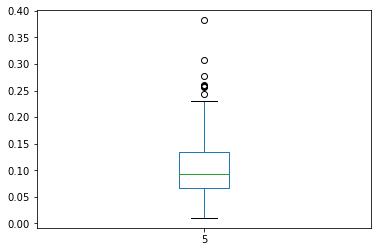

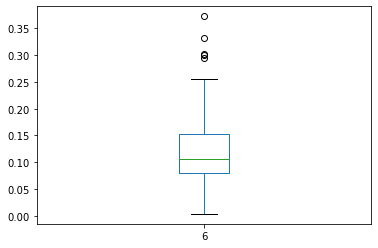

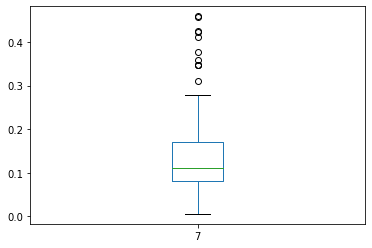

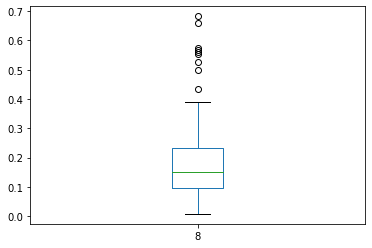

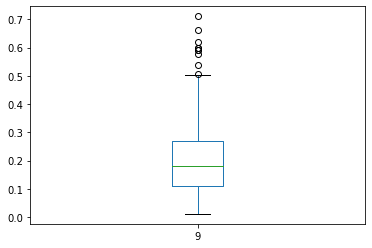

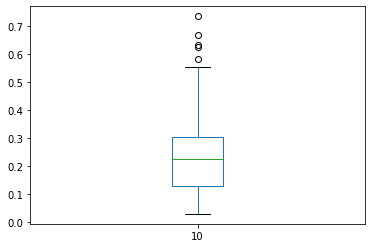

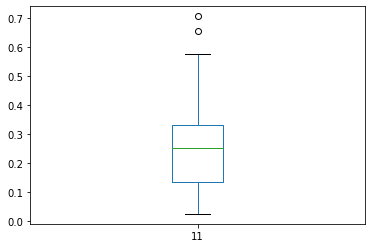

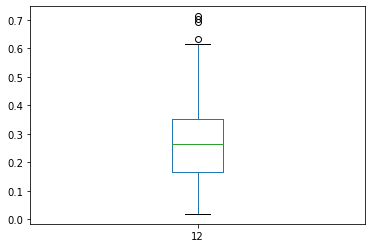

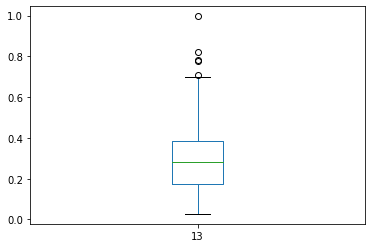

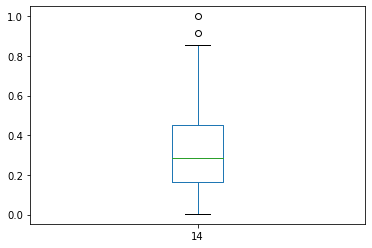

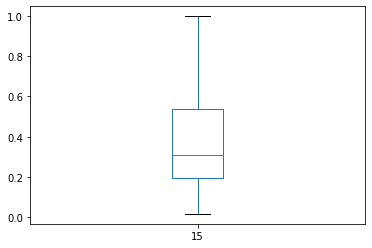

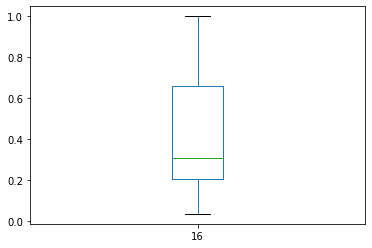

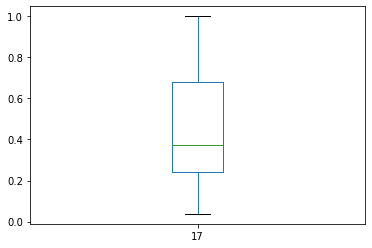

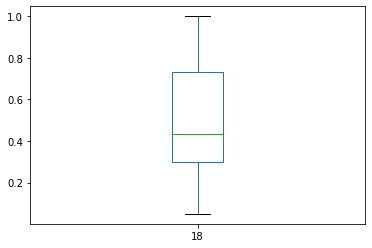

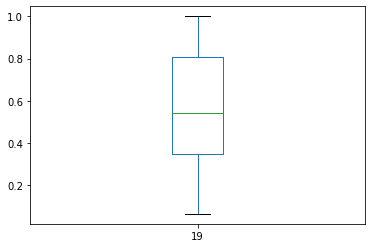

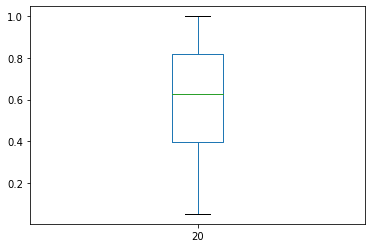

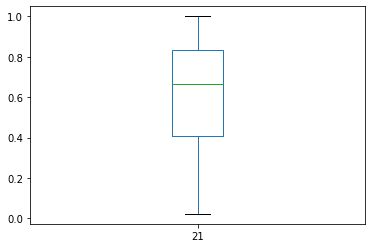

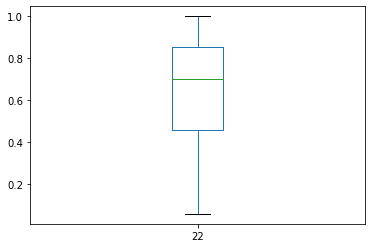

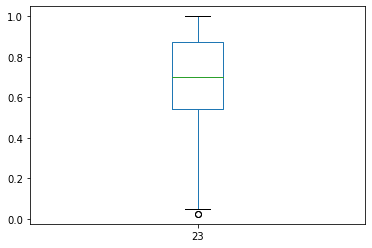

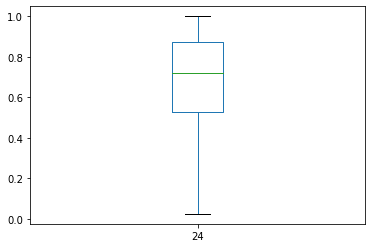

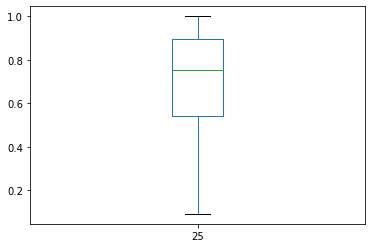

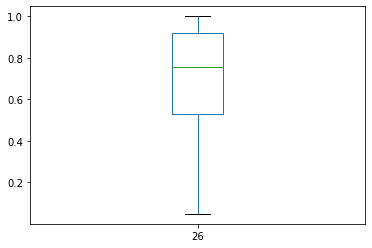

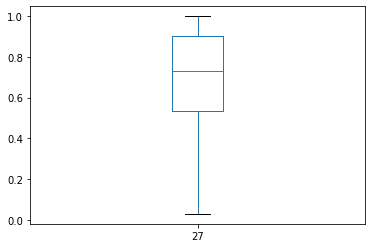

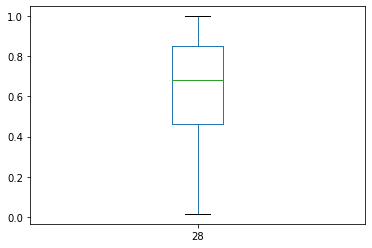

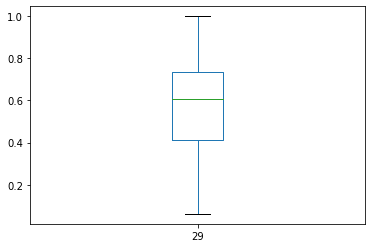

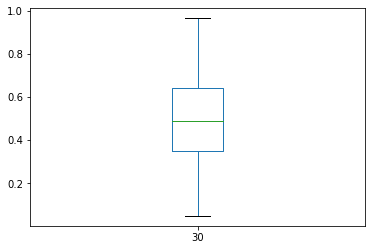

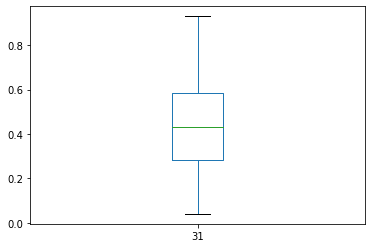

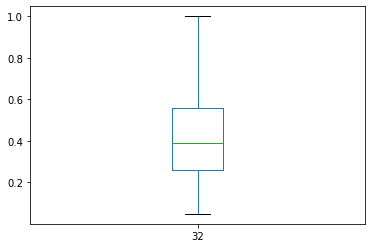

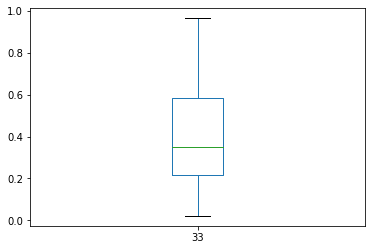

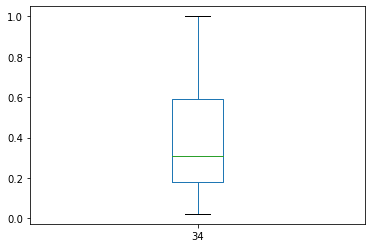

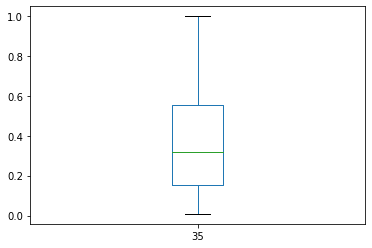

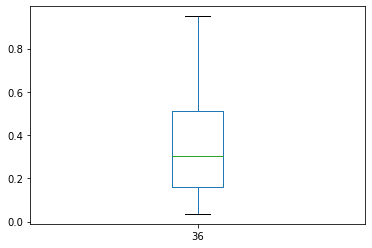

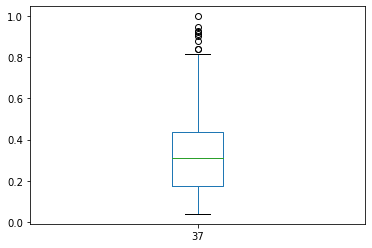

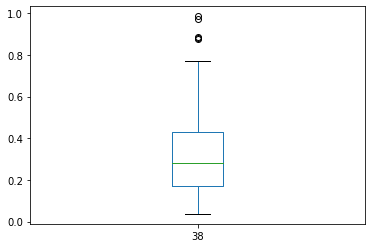

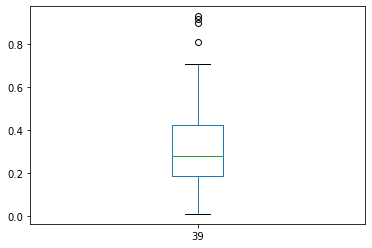

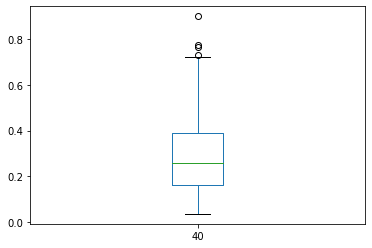

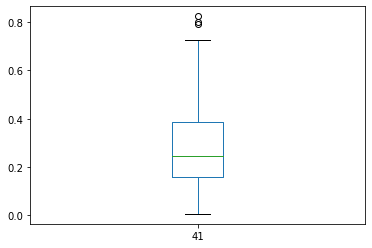

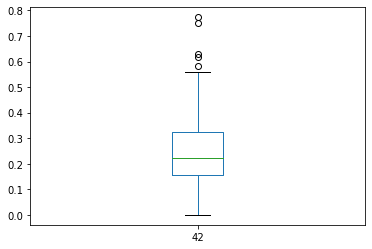

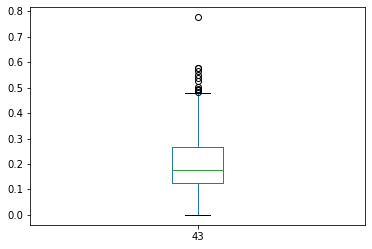

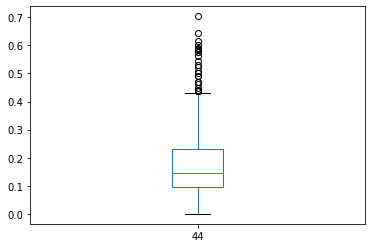

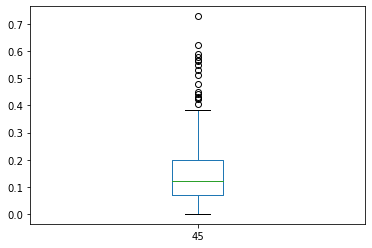

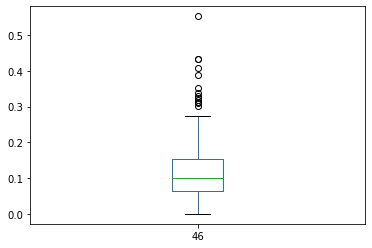

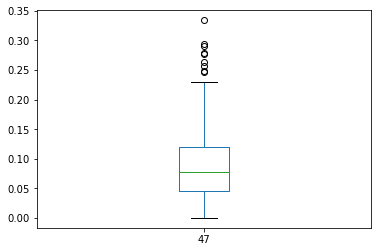

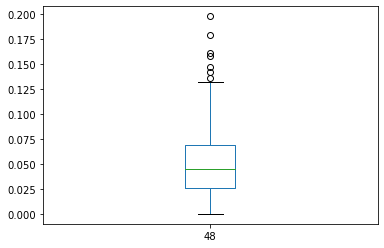

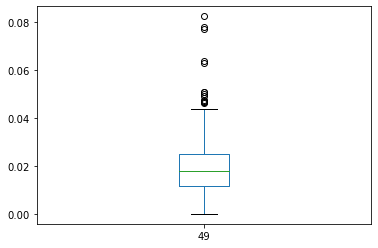

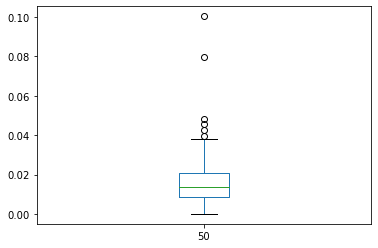

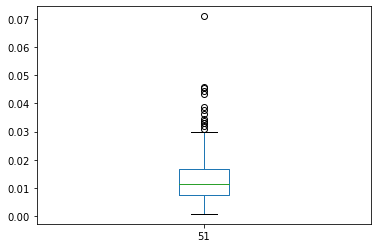

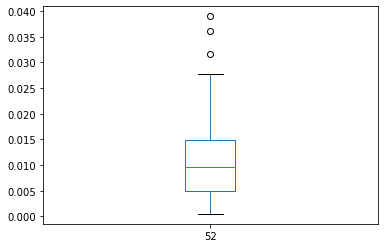

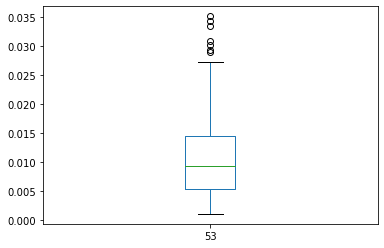

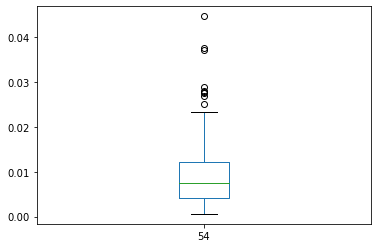

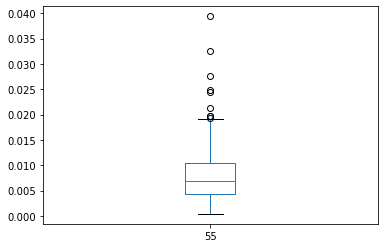

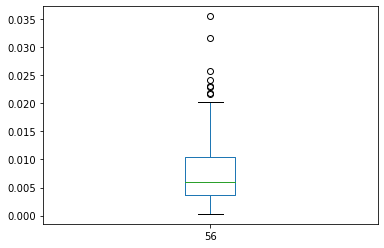

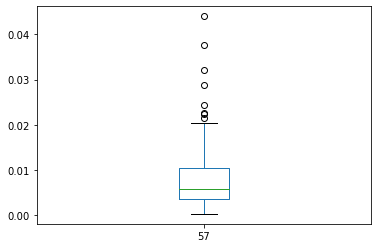

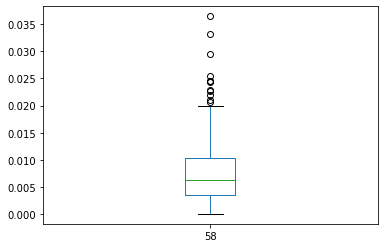

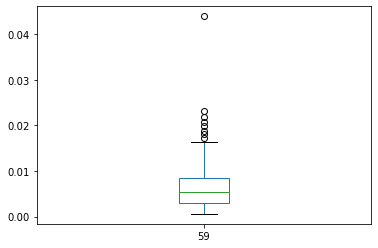

TypeError: no numeric data to plot

In [9]:
for i in ds:
    ds[i].plot.box()
    plt.show()

In [11]:
ds.skew()

0     2.122983
1     2.149965
2     2.645849
3     3.397590
4     2.020369
5     1.243828
6     0.977346
7     1.482755
8     1.654558
9     1.278532
10    0.980388
11    0.580918
12    0.730580
13    1.028081
14    0.761921
15    0.687003
16    0.648143
17    0.518349
18    0.282680
19   -0.089670
20   -0.253902
21   -0.398178
22   -0.605569
23   -0.698045
24   -0.787297
25   -0.673803
26   -0.625869
27   -0.608543
28   -0.438803
29   -0.142382
30    0.265875
31    0.304906
32    0.429747
33    0.576483
34    0.602241
35    0.631304
36    0.691936
37    1.051649
38    0.920842
39    0.856537
40    0.866684
41    0.858517
42    0.911296
43    1.258602
44    1.371554
45    1.700582
46    1.783552
47    1.287541
48    1.266425
49    1.776935
50    2.724246
51    2.098458
52    1.053124
53    1.102569
54    1.782651
55    1.810948
56    1.685823
57    2.094443
58    1.736231
59    2.769687
dtype: float64

In [12]:
x=ds.iloc[:,0:59]

In [13]:
y=ds.iloc[:,-1]

In [14]:
y

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: 60, Length: 207, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [16]:
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
from sklearn.preprocessing import power_transform

In [18]:
x=power_transform(x,method='yeo-johnson')

In [19]:
x.shape

(207, 59)

In [20]:
pca=PCA(n_components=10)

In [21]:
x=pca.fit_transform(x)

In [22]:
x.shape

(207, 10)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
sc = StandardScaler()

In [25]:
x = sc.fit_transform(x)

In [26]:
lr=LogisticRegression()

In [27]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i

print(f"Best Accuracy {accu *100} found on random_state {best_rstate}")

Best Accuracy 90.38901601830663 found on random_state 111


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=111)

In [29]:
dtc=LogisticRegression()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9761904761904762
[[23  0]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.95      0.97        19

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.98        42
weighted avg       0.98      0.98      0.98        42



In [30]:
model=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    predi=i.predict(x_test)
    print('Accuracy Score of',i,'is')
    print(accuracy_score(y_test,predi))
    print(confusion_matrix(y_test,predi))
    print(classification_report(y_test,predi))
    print('\n')

Accuracy Score of SVC() is
0.9761904761904762
[[23  0]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.95      0.97        19

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.98        42
weighted avg       0.98      0.98      0.98        42



Accuracy Score of DecisionTreeClassifier() is
0.8333333333333334
[[19  4]
 [ 3 16]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.80      0.84      0.82        19

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



Accuracy Score of KNeighborsClassifier() is
0.9523809523809523
[[23  0]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
  

In [31]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8333333333333334
[[20  3]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.83      0.79      0.81        19

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



In [32]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=111)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[23  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [33]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.9047619047619048
[[21  2]
 [ 2 17]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.89      0.89      0.89        19

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



In [34]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [35]:
y_pred_prob=rf.predict_proba(x_test)[:,0]

In [36]:
y_pred_prob

array([0.08, 0.57, 0.14, 0.94, 0.53, 0.4 , 0.59, 0.93, 0.08, 0.2 , 0.37,
       1.  , 0.19, 0.92, 0.98, 0.86, 0.67, 0.18, 0.96, 0.72, 0.62, 0.39,
       0.16, 0.09, 0.94, 0.09, 0.97, 0.68, 0.94, 0.97, 0.63, 0.4 , 0.67,
       0.09, 0.98, 0.13, 0.41, 0.25, 0.92, 0.9 , 0.04, 0.42])

In [37]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)

In [38]:
tpr

array([0.        , 0.04347826, 0.2173913 , 0.26086957, 0.39130435,
       0.43478261, 0.52173913, 0.69565217, 0.7826087 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

In [39]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10526316, 0.21052632, 0.68421053, 0.84210526, 0.94736842,
       1.        ])

In [40]:
thresholds

array([2.  , 1.  , 0.97, 0.96, 0.94, 0.93, 0.92, 0.68, 0.67, 0.53, 0.41,
       0.4 , 0.13, 0.09, 0.08, 0.04])

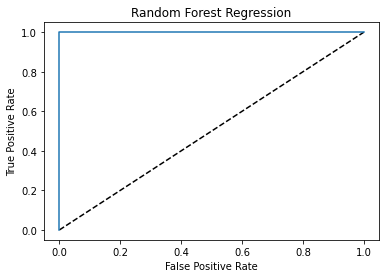

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Regression')
plt.show()

In [42]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [43]:
auc_score

1.0

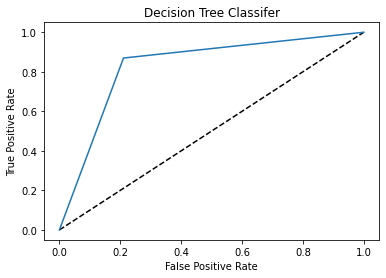

0.8295194508009153

In [44]:
y_pred_prob1=dtc.predict_proba(x_test)[:,0]
tpr1,fpr1,thresholds1=roc_curve(y_test,y_pred_prob1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1,tpr1,label='Decision Tree Classifer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Classifer')
plt.show()

auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

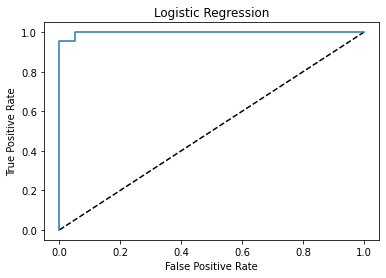

0.9519450800915332

In [45]:
y_pred_prob2=lr.predict_proba(x_test)[:,0]
tpr2,fpr2,thresholds2=roc_curve(y_test,y_pred_prob2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr2,tpr2,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(y_test,lr.predict(x_test))
auc_score

In [46]:
import joblib

In [47]:
joblib.dump(rf,'Sonar_Dataset.pkl')

['Sonar_Dataset.pkl']